# Отчет по лабораторной работе №5. 
## Численное решение системылинейных уравнений, численное интегрирование. 
## Вариант № 21
Отчет выполнил: Бугров Александр, 430 группа



## Постановка задачи
Дана система уравнений 

$$n^3x_i=\sum\limits_{j=1}^n \frac{j^2+\sin^2 j}{\ln(1+j^3+i^2)}x_j+\int\limits_1^3 \ t^2exp(-i^2t^2)) dt$$

где $i=1\ldots10000$.

1. Вычислить столбец правой части -- определенных интегралов рекуррентным методом трапеций с относительной точностью 0,01.

2. Для  i=2 построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации используемого метода численного интегрирования.

4. График зависимости свободных членов системы от i.

5. Решение систему уравнений заданным методом последовательных приближений для числа уравнений вплоть до 1000  с относительной точностью 0,001. 

6. Число обусловленности линейной системы.

6. Построить график решения от i, график зависимости невязки от i,а также график зависимости нормы решения от номера итерации.

## Теоретическая часть


## Итерационные методы решения
Решаем систему

$$Ax=b$$ 

Итерационными методами называются приближенные методы, в которых решение системы получается как предел последовательности векторов $\{x^k\}_{k=0}^{\infty}$, каждый последующий элемент которой вычисляется по некоторому единому правилу. Начальное приближение решения $x^0$ в этой программе выбирается как столбец свободных членов $b$.

Последовательность $\{x^k\}_{k=0}^{\infty}$ называется итерационной, а её элементы последовательными итерациями (приближениями).

Важной характеристикой итерационного процесса является скорость схожимости итерационной последовательности. Говорят, что итерация $x^k$ является с точностью $\varepsilon$ приближенным решением системы, если

$$||x^k-x^0||<\varepsilon,$$

где $x^0$- точное решение системы.

Как правило, для итерационного метода решения системы существует такая последовательность невырожденных матриц $H_k$, $k=1,2\dots$, что правило построения элементов итерационной последовательности записывается в виде:

$$x^{k+1}=T_kx^k+H_kb$$

Вектор $\varphi^k=x^k-x^0$ называется вектором ошибки, а вектор $r^k=Ax^k=b$ - вектором невязки.

Итерационный метод называется стационарным, если матрица $H_k$ не зависит от номера шага k.  В противном случае метод называется нестационарным. Для того, чтобы стационарный итерационный процесс

$$x^{k+1}=Tx^k+Hb$$

сходился, достаточно, чтобы ля какой-либо одной нормы матрицы $T$ выполнялось неравенство

$$||T||<1.$$

## Метод последовательных приближений

В данном методе $H_k=E$, $T_k=A-E\equiv\alpha$, или если задать систему уравнений сразу в виде

$$x=\alpha\cdot x +\beta,$$

то итерационный процесс записывается в первичных обозначениях:

$$x^{k+1}=\alpha x^k+\beta$$

В программе выполняется достаточное условие сходимости итерационного процесса 

$$||T||\equiv||\alpha||<1$$

## Практическая часть

In [37]:
from numpy import cos,sin,pi,log,sort,inf,linspace,abs,sum,append,array
import math
math.e 
e=2.71
test = math.inf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import time

In [38]:
a,b=0,2# Пределы интегрирования определенного интеграла
inteps=0.01 # Относительная погрешность расчета интеграла
eps=0.001 # Условие сходимости |xk-xkk|<eps
n=1000

In [39]:
def F(i,t):
	return t**2*e**( -i**2*t**2 )

def coeff(i,j):
	if i!=j:
		return -(j**2+sin(j))/(1+j**3+j**2)*cos(j+1)
	else:
		return -(j**2+sin(j))/(1+j**3+j**2)*cos(j+1)+n**3

def sila(i):
	def Fi(t):
		return F(i,t)
	return trapz(Fi,a,5/i,inteps)

In [40]:
#Метод трапеции
trap=[]
trapf=[]
def trapz (f,a,b,eps,integ0=inf,S=[],it=0,plot=False):
    if len(S)==0:
            S=linspace(a,b,3)
    h=S[1]-S[0]
    integ=sum([(f(S[i])+f(S[i+1]))/2*h for i in range(0,len(S)-1)])
    if abs((integ-integ0)/integ0)>eps:
        Snew=S
        for i in range(0,len(S)-1):
            Snew=append(Snew,(S[i+1]+S[i])/2)
        Snew=sort(Snew)
        if plot:
            trap.append(it)
            trapf.append(integ)
        return trapz(f,a,b,eps,integ0=integ,S=Snew,it=it+1,plot=plot)
    else:
        if plot==True:
            plt.title('Значение интеграла при i=2')
            plt.plot(trap,trapf,'o-')
            plt.show()
        return integ

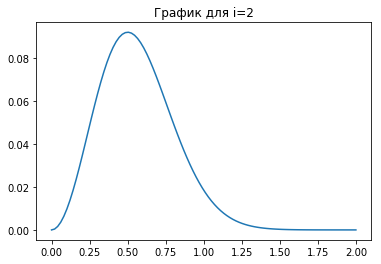

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


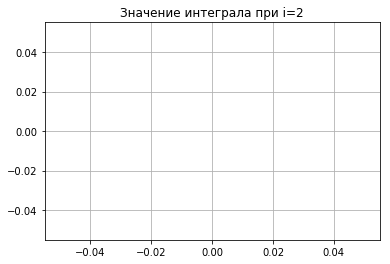

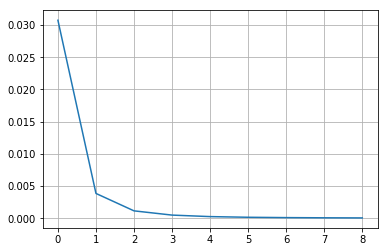

In [41]:
# Задание 3
def f(t):
	return F(2,t)
plt.title('График для i=2')
plt.plot(np.linspace(a,b,100),f(np.linspace(a,b,100)))
plt.show()
plt.grid()
trapz(f,a,b,inteps/100000,plot=True)

B=np.array([sila(i) for i in range(1,10)])
# Задание 4
plt.plot(B,'-')
plt.grid()
plt.show()

In [42]:
# Задание 5
Ax=b
eps=0.0001
A=np.array([[coeff(i,j) for i in range(1,n+1)] for j in range(1,n+1)])
b=np.array([sila(i) for i in range(1,n+1)])

Xk=np.zeros(n)
Xkk=np.ones(n)
E=np.identity(n)

N=0

H=1/np.linalg.norm(A,ord=1)*E

x0=np.dot(np.linalg.inv(A),b)
print(np.dot(A,x0)-b)
while np.linalg.norm(Xk-Xkk,ord=1)>eps:
    print(N)
    if N>10**6:
        break
        N+=1
    Xkk=Xk
    Xk=Xkk+np.dot(H,(b-np.dot(A,Xkk)))
print(Xk,N)
print(np.dot(A,Xk)-b)

[ 2.08166817e-17  4.77048956e-18  4.33680869e-19 -4.33680869e-19
  1.08420217e-19  2.71050543e-20  1.35525272e-20  1.62630326e-19
  2.03287907e-20  1.35525272e-20 -2.37169225e-20 -1.35525272e-20
  0.00000000e+00  5.08219768e-21  6.77626358e-21  7.62329653e-21
  2.54109884e-21 -6.77626358e-21 -5.08219768e-21 -4.23516474e-21
  1.69406589e-21  8.47032947e-22 -8.47032947e-22 -8.47032947e-22
 -1.27054942e-21  8.47032947e-22 -6.35274710e-22  4.23516474e-22
 -1.05879118e-21  1.05879118e-21 -8.47032947e-22  1.69406589e-21
  4.23516474e-22  2.11758237e-22  5.29395592e-22  7.41153829e-22
 -4.23516474e-22  5.29395592e-22 -4.23516474e-22 -1.05879118e-22
 -4.23516474e-22 -5.29395592e-23  1.05879118e-22  4.23516474e-22
 -5.29395592e-23 -4.23516474e-22 -4.23516474e-22 -1.05879118e-22
 -3.17637355e-22  0.00000000e+00  1.05879118e-22  1.85288457e-22
  2.64697796e-23  1.05879118e-22  1.32348898e-22  3.70576914e-22
 -5.29395592e-23 -1.58818678e-22 -7.94093388e-23  1.85288457e-22
  1.58818678e-22  2.11758

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
